# Getting Started with Vanna
This notebook shows how to use Vanna to ask questions from a database using sample data

# Install and Import Vanna

In [1]:
%pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00


In [2]:
import vanna as vn

# Log In to Vanna
Vanna provides a function to get an API key. You'll get a code sent to your e-mail.
You can save your API key for future usage so that you don't have to log in every time.

In [5]:
api_key = vn.get_api_key('jc2156@gmail.com') # Put your email here
vn.set_api_key(api_key)

Check your email for the code and enter it here: CZZ04H


# Set Model
`chinook` is a public model that refers to the [Chinook sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

In [6]:
vn.set_model('chinook')

# Connect to the Database
Here we're connecting to a SQLite database but you can connect to [any database that you have a Python driver for](databases.html)

In [7]:
vn.connect_to_sqlite('https://github.com/lerocha/chinook-database/raw/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite')

# Ask Questions
Now we're going to use `vn.ask` to ask questions and it'll generate SQL, run the SQL, show the table, and generate a chart

SELECT a.name,
       sum(il.quantity) as totalsales
FROM   artist a
    INNER JOIN album al
        ON a.artistid = al.artistid
    INNER JOIN track t
        ON al.albumid = t.albumid
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
GROUP BY a.name
ORDER BY totalsales desc limit 5;


,Name,totalsales
0,Iron Maiden,140
1,U2,107
2,Metallica,91
3,Led Zeppelin,87
4,Os Paralamas Do Sucesso,45


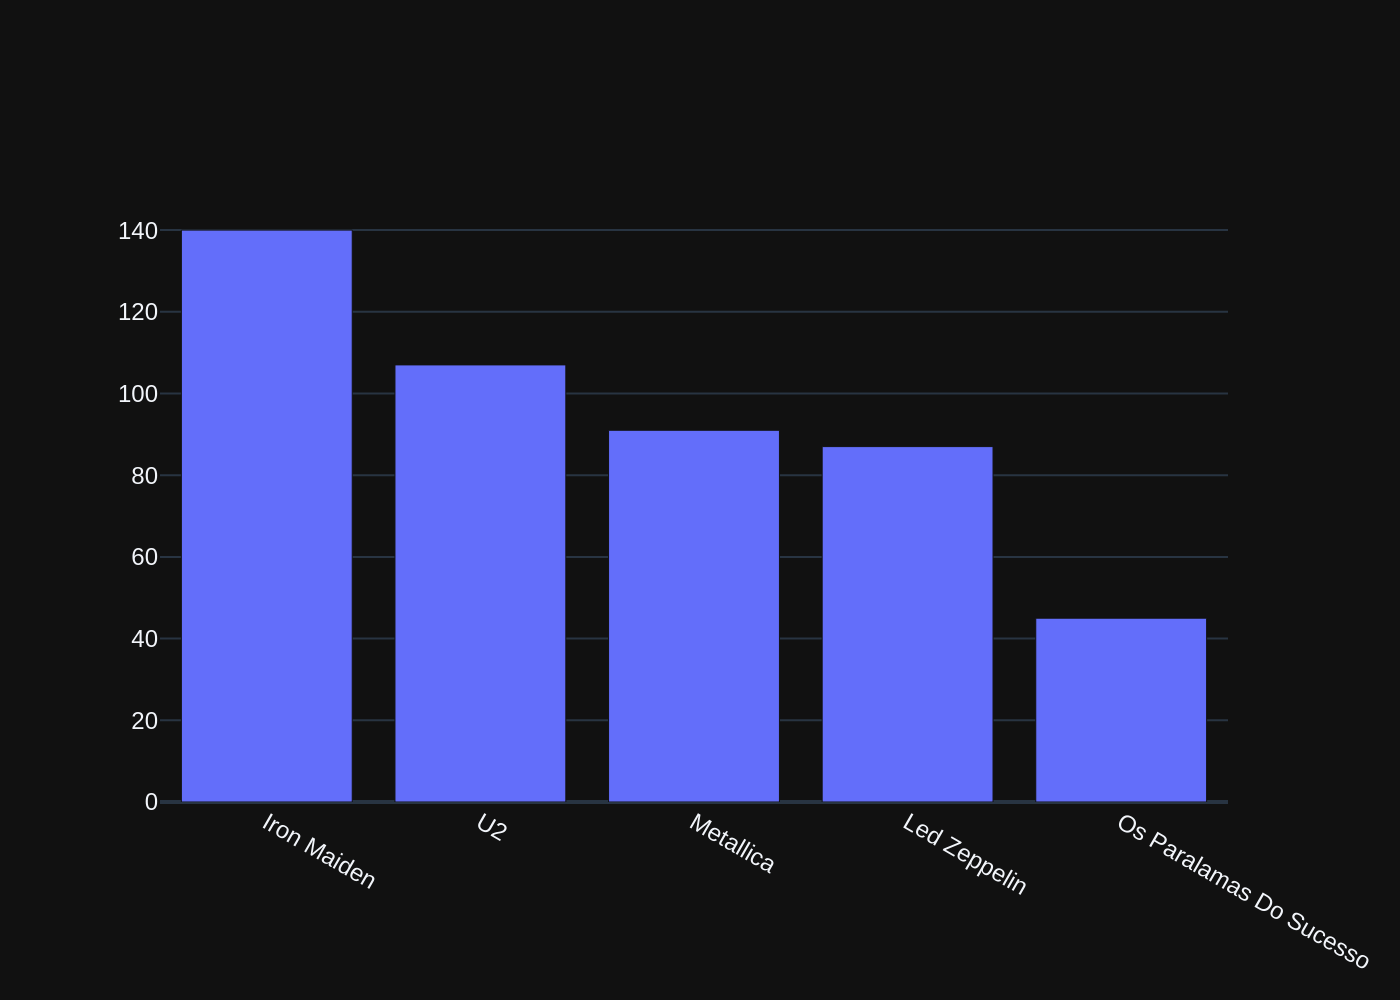

AI-generated follow-up questions:

* What are the top 5 albums by sales?
* Which genre has the highest sales?
* Can you provide a breakdown of sales by artist and album?
* What are the top 10 artists by sales?
* What are the top 5 tracks by sales?
* Which artist has the highest average sales per album?
* Can you provide a breakdown of sales by country?
* What is the total sales revenue for each genre?
* What are the top 5 customers by total purchase amount?
* Can you provide a breakdown of sales by year?


In [8]:
vn.ask("What are the top 5 artists by sales?")

SELECT strftime('%Y', invoicedate) as year,
       sum(total) as total_sales
FROM   invoice
GROUP BY year;


,year,total_sales
0,2009,449.46
1,2010,481.45
2,2011,469.58
3,2012,477.53
4,2013,450.58


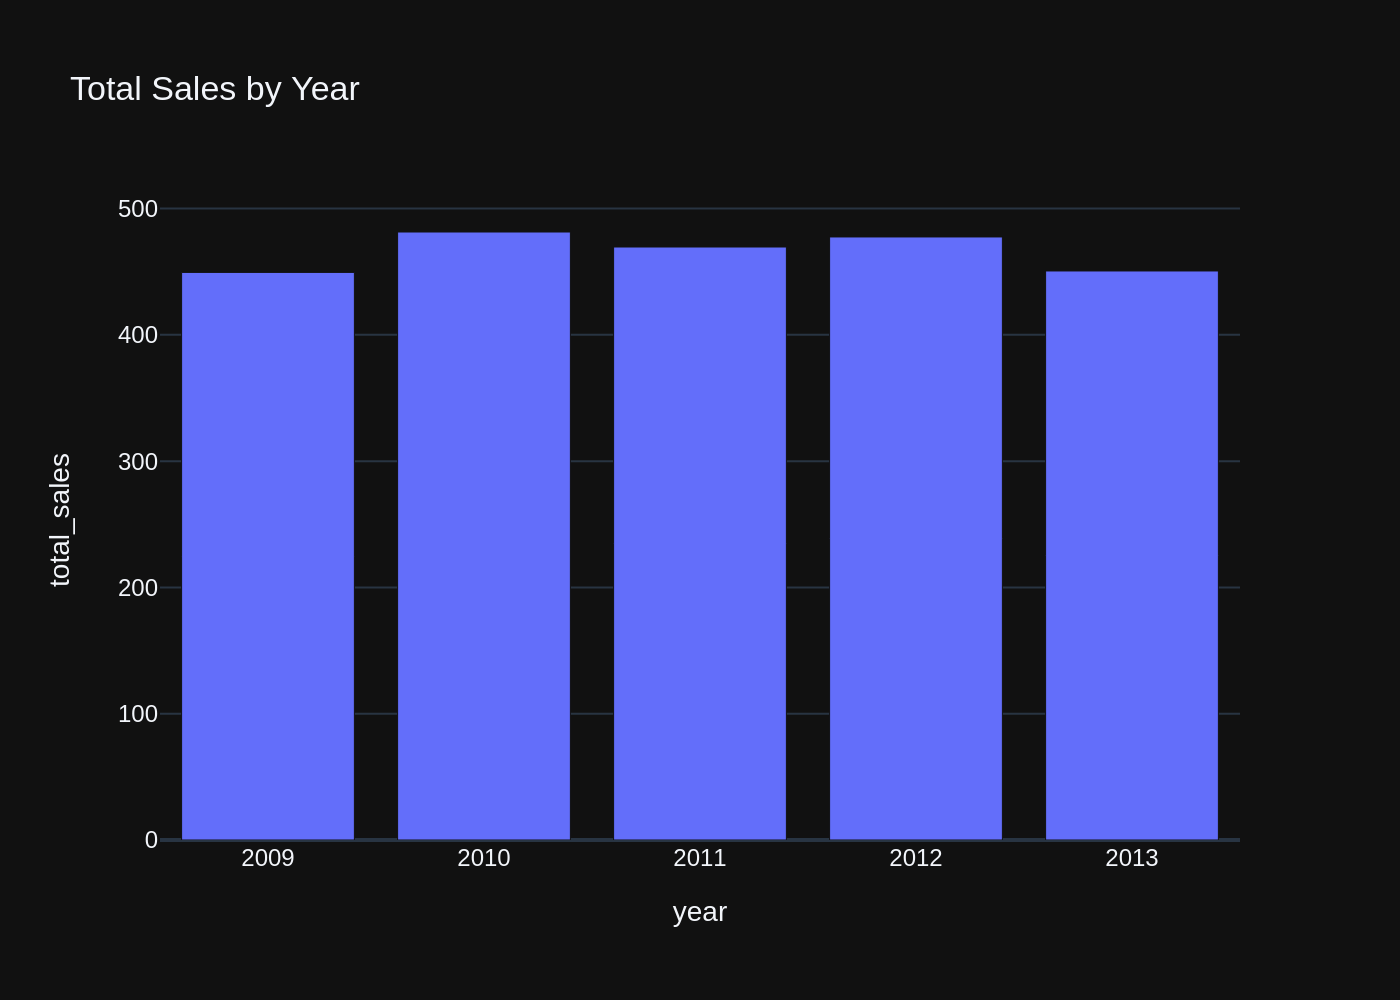

AI-generated follow-up questions:

* What were the total sales by genre?
* What were the total sales by artist?
* What were the total sales by media type?
* What were the total sales by customer?
* What were the total sales by employee?
* What were the total sales by album?
* What were the total sales by country?
* What were the total sales by city?
* What were the total sales by postal code?
* What were the total sales by track?
* What were the total sales by invoice date?
* What were the total sales by billing address?


In [9]:
vn.ask("What were the total sales by year?")

SELECT g.name,
       sum(il.quantity) as total_sales
FROM   genre g
    INNER JOIN track t
        ON g.genreid = t.genreid
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
GROUP BY g.name
ORDER BY total_sales desc limit 5;


,Name,total_sales
0,Rock,835
1,Latin,386
2,Metal,264
3,Alternative & Punk,244
4,Jazz,80


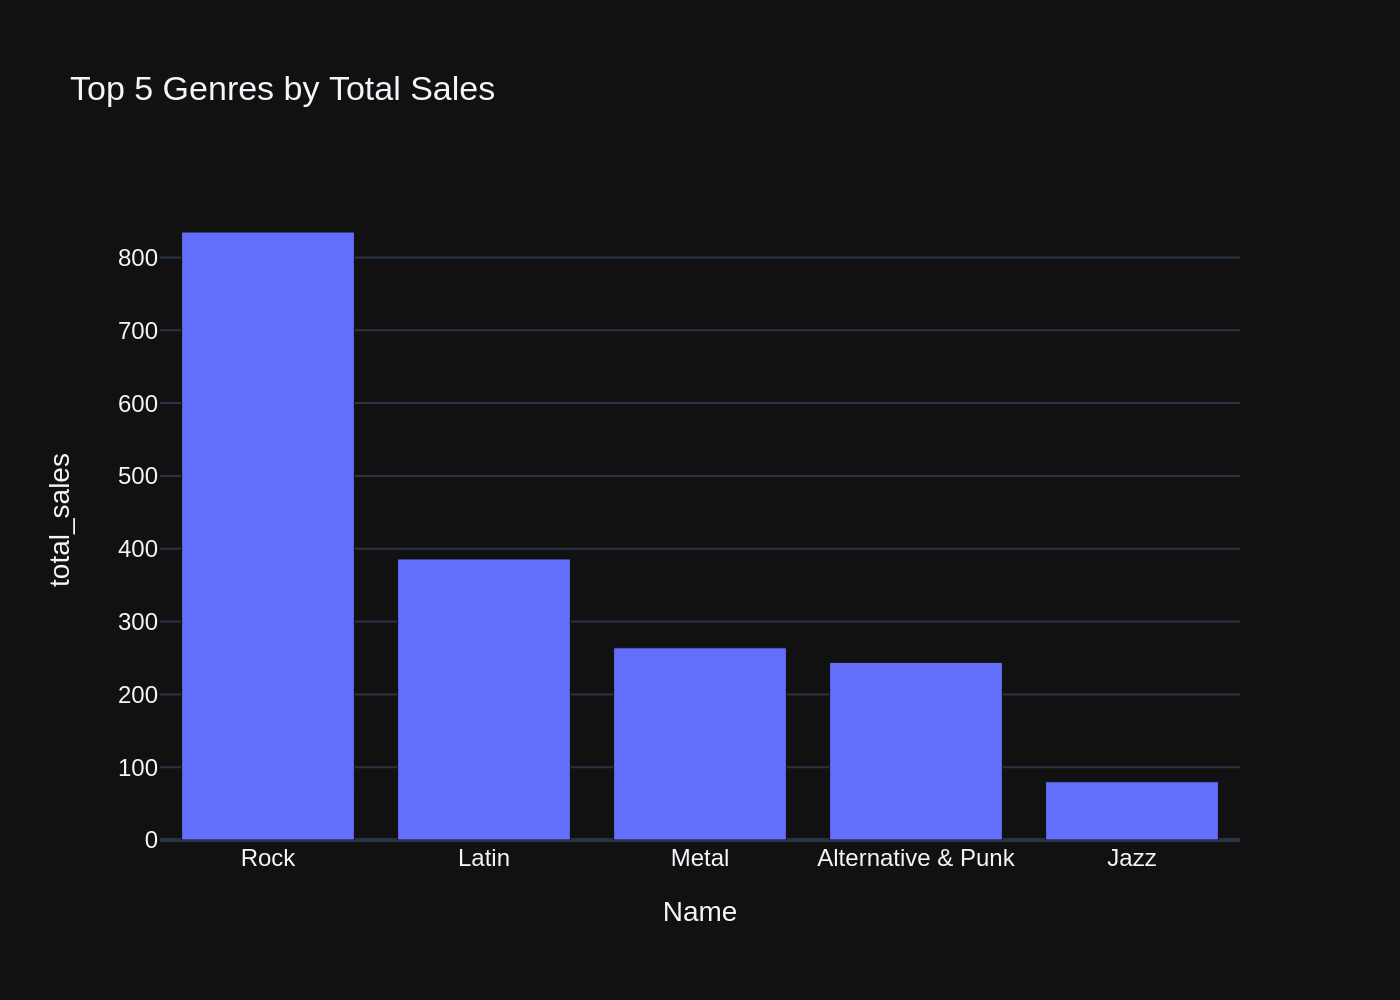

AI-generated follow-up questions:

* What are the total sales for each individual genre?
* What are the top 5 artists with the highest total sales?
* What are the top 5 albums with the highest total sales?
* What is the average number of tracks per album?
* How many tracks are there for each media type?
* What is the total sales for each year?
* What are the top 5 customers with the highest total purchases?
* What is the total sales for each country?
* What are the top 5 tracks with the highest sales?
* What is the average unit price of tracks in each genre?


In [10]:
vn.ask("What are the top 5 genres by total sales?")

# Now try your own question

For reference, these are the tables in the database

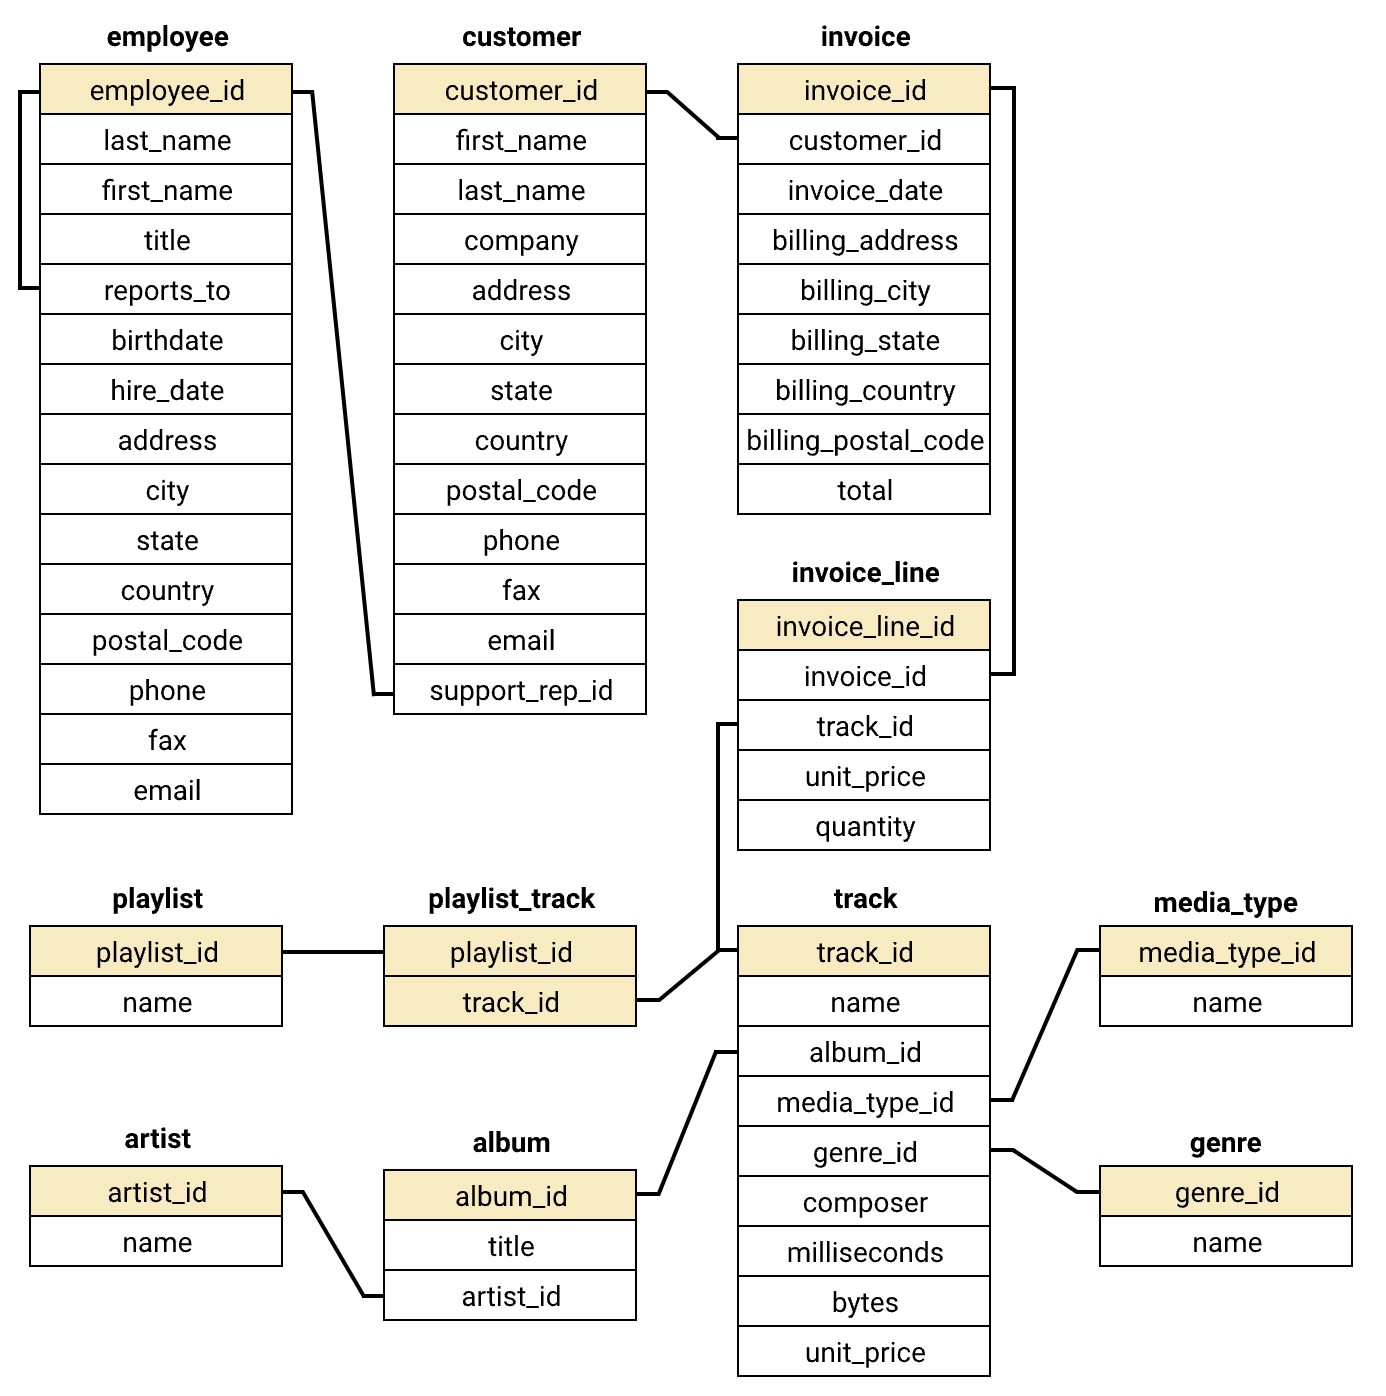

Enter a question: What are the top 5 tracks with the highest sales?
SELECT t.name,
       sum(il.quantity) as total_sales
FROM   track t
    INNER JOIN invoiceline il
        ON t.trackid = il.trackid
GROUP BY t.name
ORDER BY total_sales desc limit 5;


,Name,total_sales
0,The Trooper,5
1,Untitled,4
2,The Number Of The Beast,4
3,Sure Know Something,4
4,Hallowed Be Thy Name,4


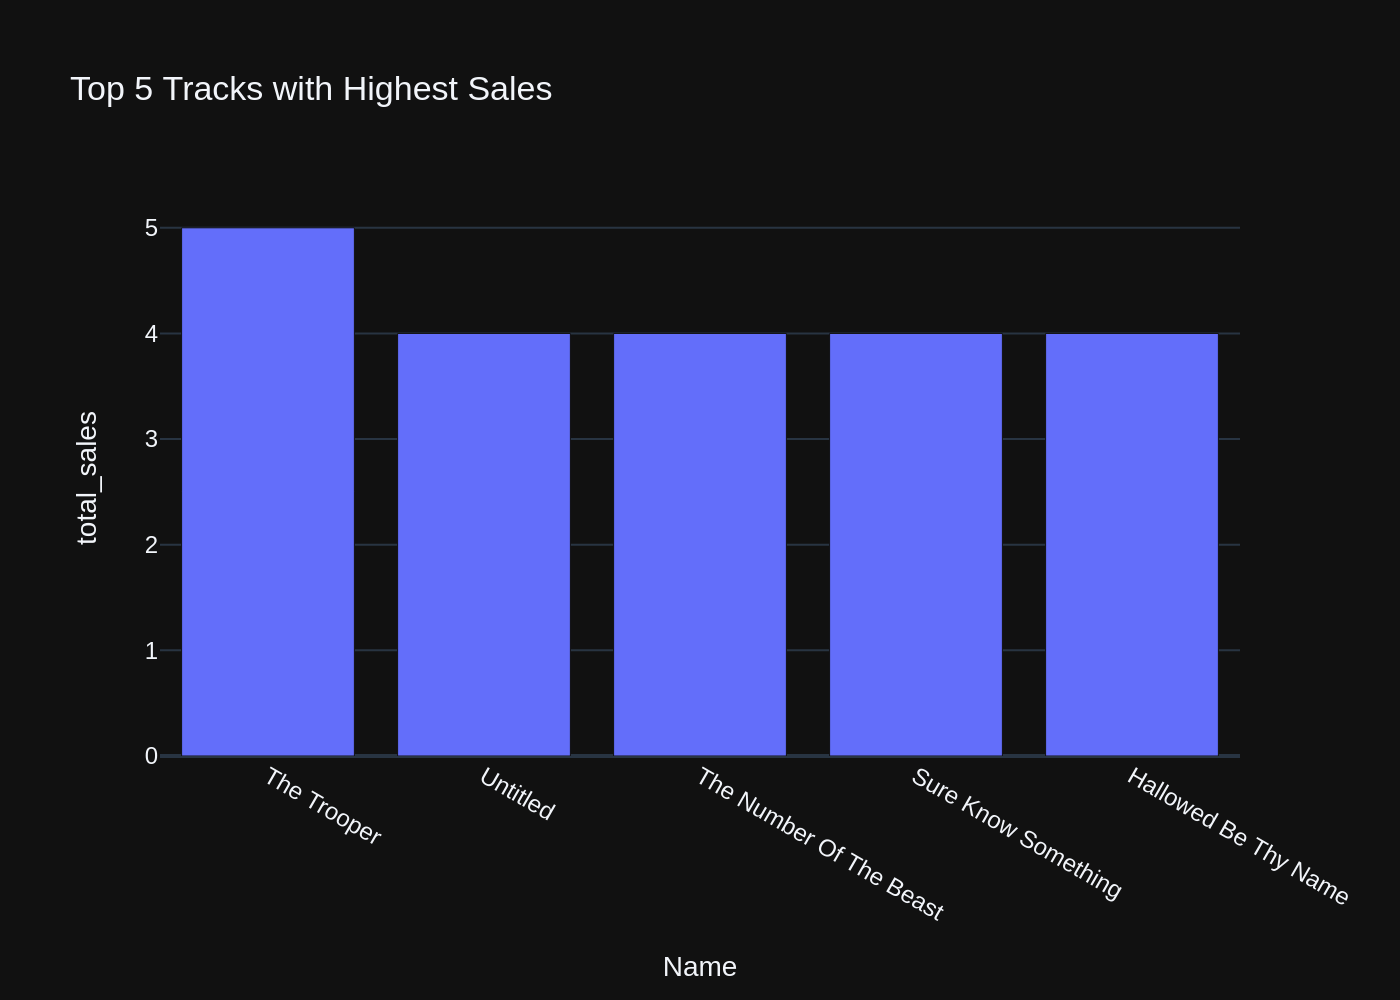

AI-generated follow-up questions:

* What are the top 5 tracks with the lowest sales?
* Which albums have the highest total sales?
* What are the top 5 artists with the highest total sales?
* What are the top 5 genres with the highest total sales?
* What is the average unit price of tracks?
* Which tracks have the longest duration?
* How many tracks are there in each genre?
* What are the top 5 tracks with the highest unit price?
* Which artists have the most tracks in the database?
* What is the total revenue generated from track sales?


In [11]:
# Put your question here:
vn.ask()